Name : Janhavi Sachin Phulavare
Topic : Car Price Prediction

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

301 Rows

9 columns

Information of Dataset :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Statistical Information :

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Checking for Null values :

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Creating New Column (Car Age)

In [ ]:
df['Car_age'] = 2023-df['Year']


Exploratory Data Analysis

Unique Value Counts For Categorical Variables :

In [ ]:
print('Fuel Types :')
print(df.Fuel_Type.value_counts())
print('\nSelling Types :')
print(df.Selling_type.value_counts())
print('\nTransmission Types :')
print(df.Transmission.value_counts())
print('\nOwner Types :')
print(df.Owner.value_counts())

Fuel Types :
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Selling Types :
Dealer        195
Individual    106
Name: Selling_type, dtype: int64

Transmission Types :
Manual       261
Automatic     40
Name: Transmission, dtype: int64

Owner Types :
0    290
1     10
3      1
Name: Owner, dtype: int64


Pie Chart for Owner Types :

   Owner
0    290
1     10
3      1


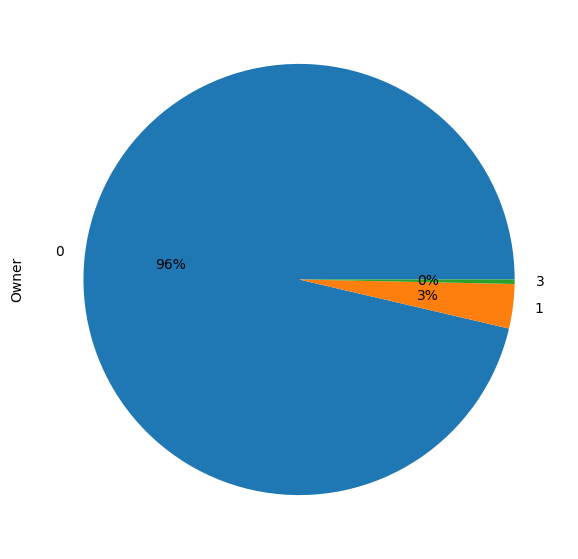

In [ ]:
abc=df['Owner'].value_counts()
owners=pd.DataFrame(abc)
print(owners)
df['Owner'].value_counts().plot(kind='pie',autopct='%1.f%%',figsize=(7,7));


Count Plot for Fuel Types :

(array([0, 1, 2]),
 [Text(0, 0, 'Petrol'), Text(1, 0, 'Diesel'), Text(2, 0, 'CNG')])

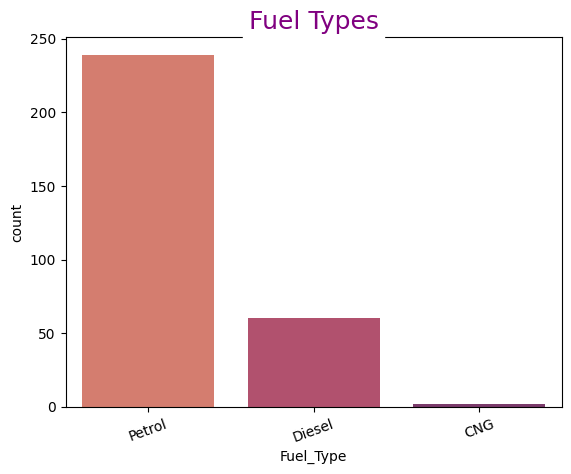

In [ ]:
sns.countplot(x='Fuel_Type',data=df,palette='flare')
plt.title("Fuel Types",
          fontsize='18',
          backgroundcolor='white',
          color='purple');
plt.xticks(rotation=20)

Most cars are petrol cars.

Count Plot for Transmission Types :

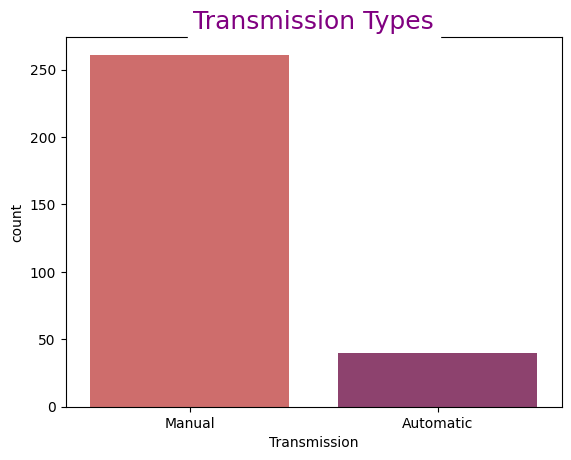

In [ ]:
sns.countplot(x='Transmission',data=df,palette='flare')
plt.title("Transmission Types",
          fontsize='18',
          backgroundcolor='white',
          color='purple');

Cars have more manual transmission type than automatic.

Bar Graph For Year in which car was bought :

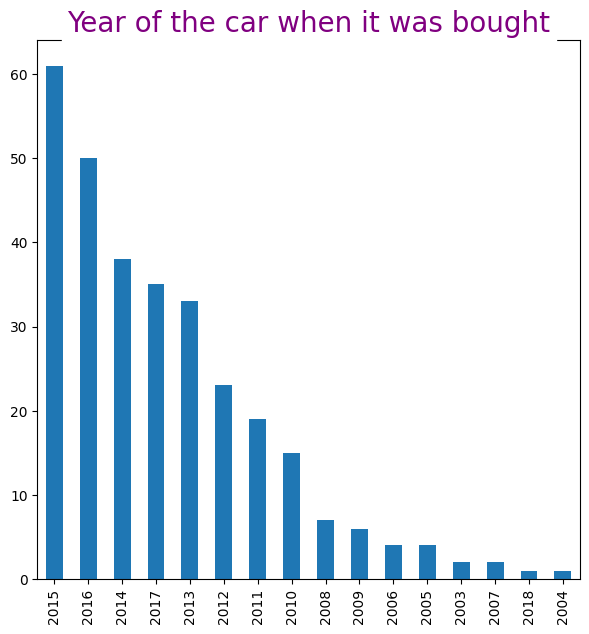

In [ ]:
df['Year'].value_counts().plot(kind='bar',figsize=(7,7));
plt.title("Year of the car when it was bought",
          fontsize='20',
          backgroundcolor='white',
          color='purple');

Most of the cars were bought in the year 2015 followed by 2016. Least in 2018 and 2004.

Pie Chart for Top 5 Models Sold :

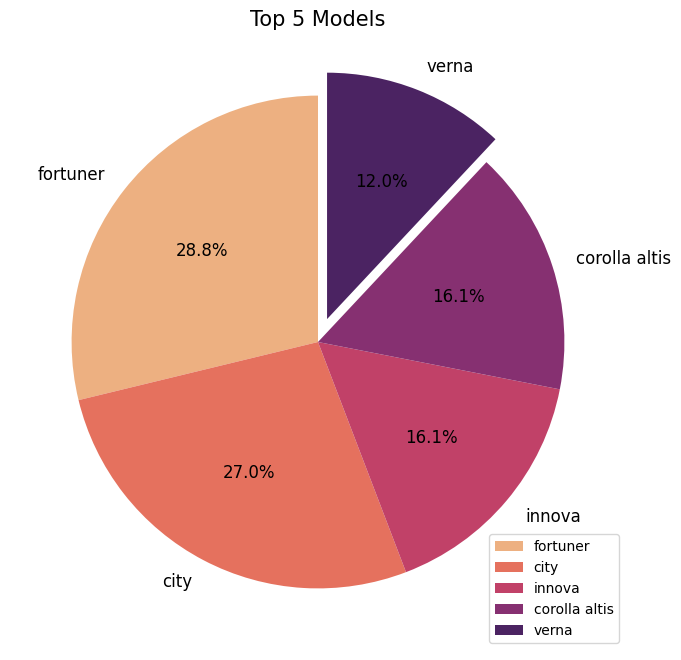

In [ ]:
a=df.groupby('Car_Name')['Selling_Price'].sum().sort_values(ascending= False).head(5)
model=pd.DataFrame(a).reset_index()

exp1=[0,0,0,0,0.1]
model.plot.pie(y='Selling_Price',autopct="%1.1f%%",figsize=(12,8),
                  fontsize=12,cmap="flare",startangle=90,
                   explode=exp1,labels=model['Car_Name'])
plt.title("Top 5 Models",fontsize=15)
plt.ylabel("")
plt.legend(loc='lower right')
plt.show()


Fortuner is the most sold car followed by city and innova.

Horizontal Bar Graph for Top 10 Cars Wrt Kilometres Driven :

<Axes: ylabel='Car_Name'>

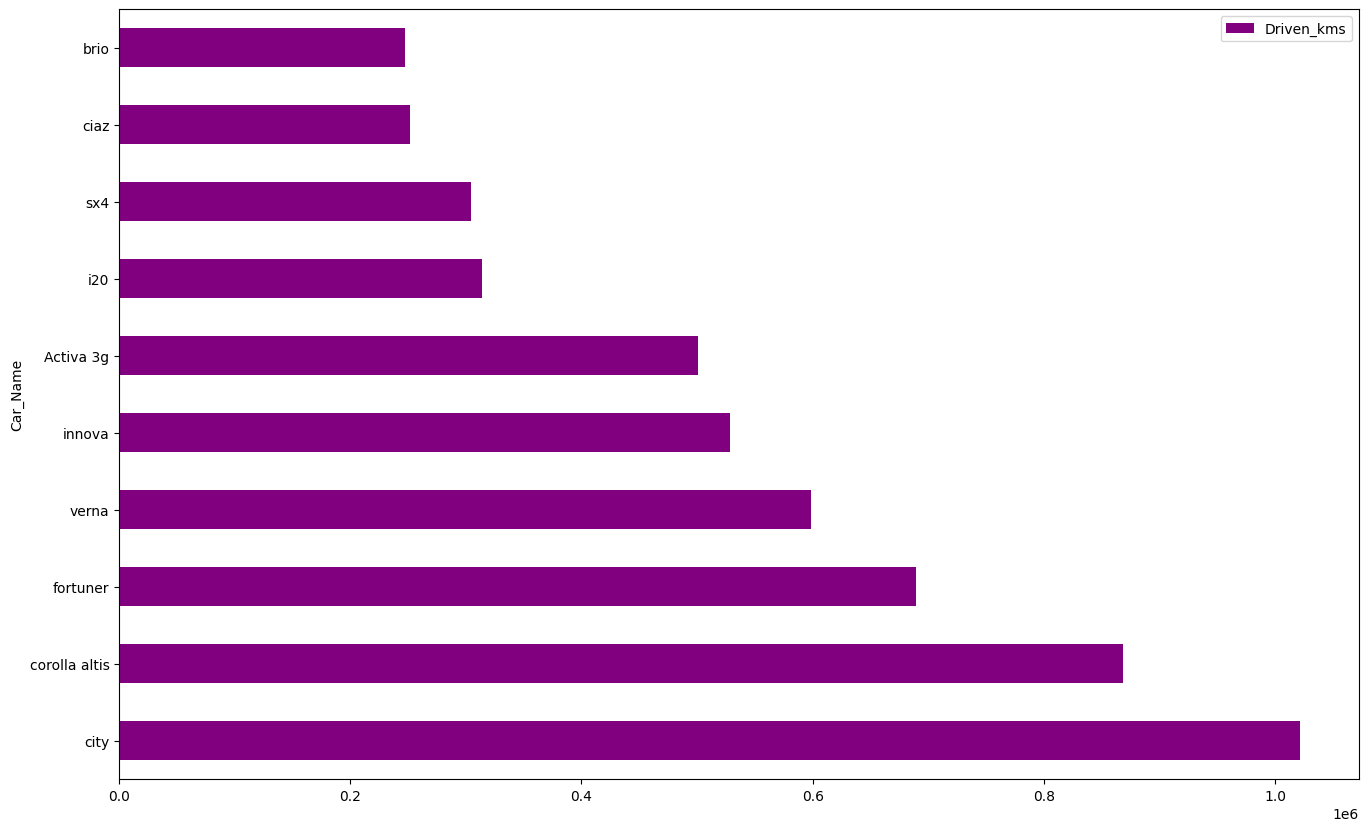

In [ ]:
a=df.groupby('Car_Name')['Driven_kms'].sum().sort_values(ascending= False).head(10)
model1=pd.DataFrame(a)
model1
model1.plot(kind='barh',color="purple",figsize=(16,10))

City car has driven maximum kilometres.Next are corolla altis and fortuner.On 10th rank , we have brio.

Seller Type, Transmission, Owner and Fuel Type Vs Selling Price

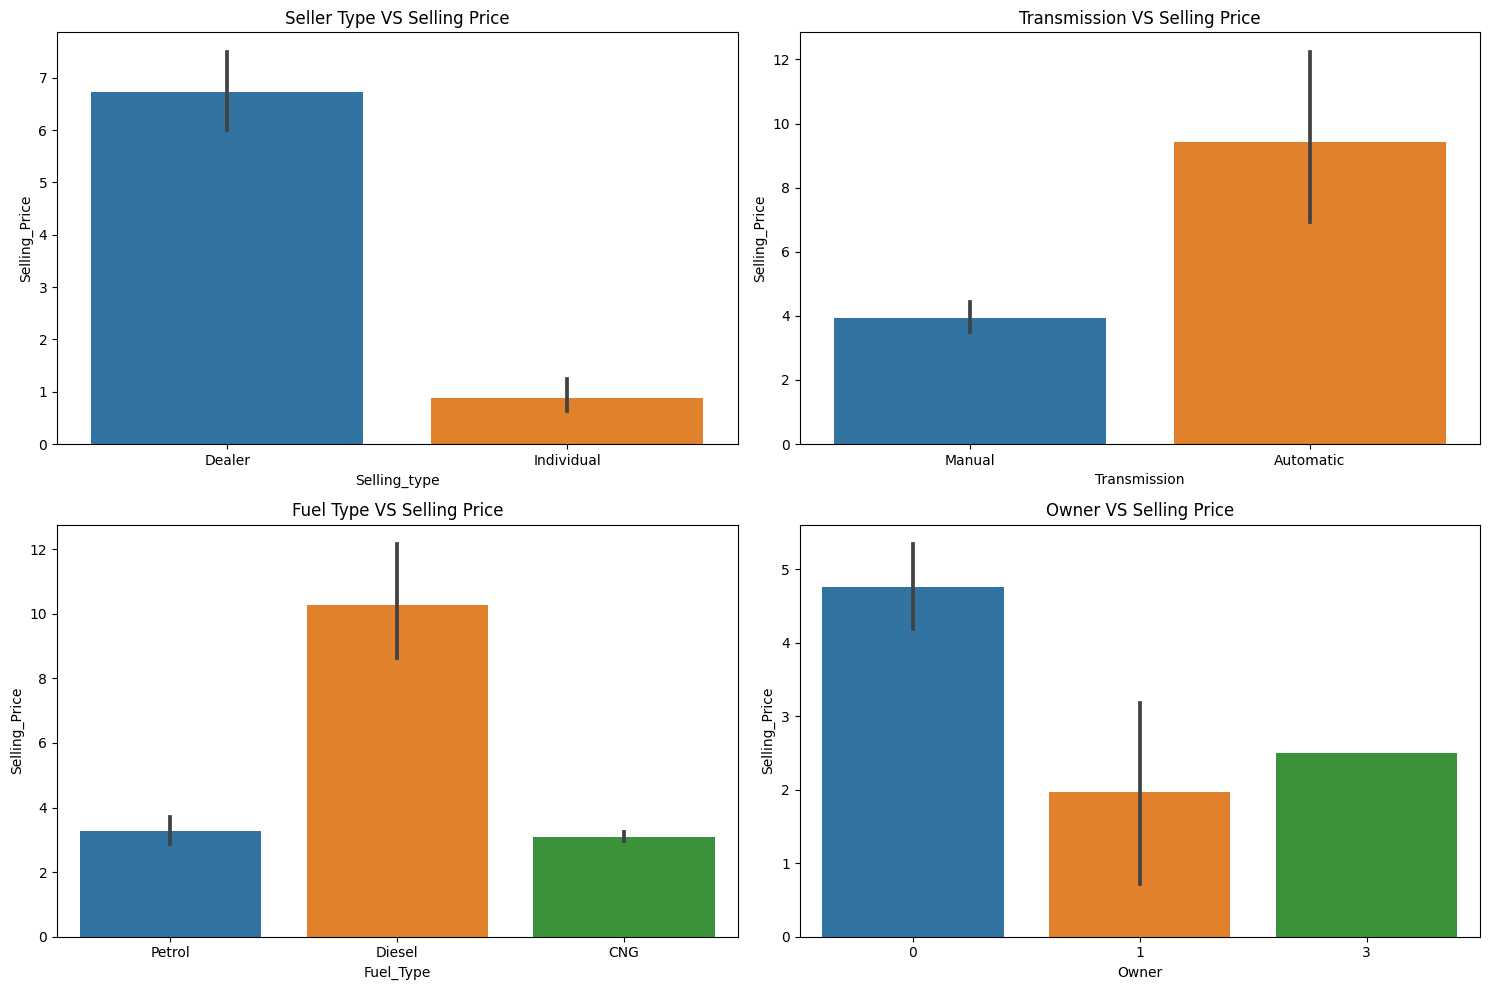

In [ ]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Seller Type VS Selling Price')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Transmission VS Selling Price')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Fuel Type VS Selling Price')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Owner VS Selling Price')
plt.tight_layout()
plt.show()

Most cars are sold by Dealers.

Automatic and disel cars are sold the most.

0 owner type has sold most cars.

Selling Price wrt Age of Car :

Text(0.5, 1.0, 'Selling Price Vs Car Age')

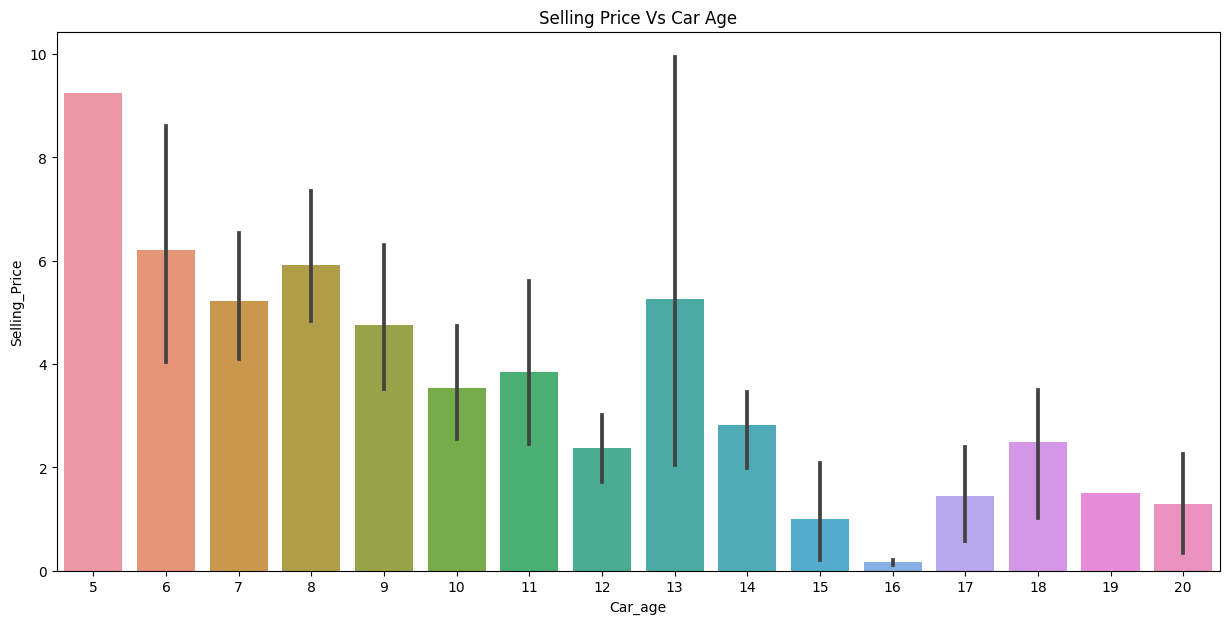

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

Selling Price of cars 5 years old would be high and gradually decreases with car of 20 years old

Text(0.5, 1.0, 'Yearly Sales')

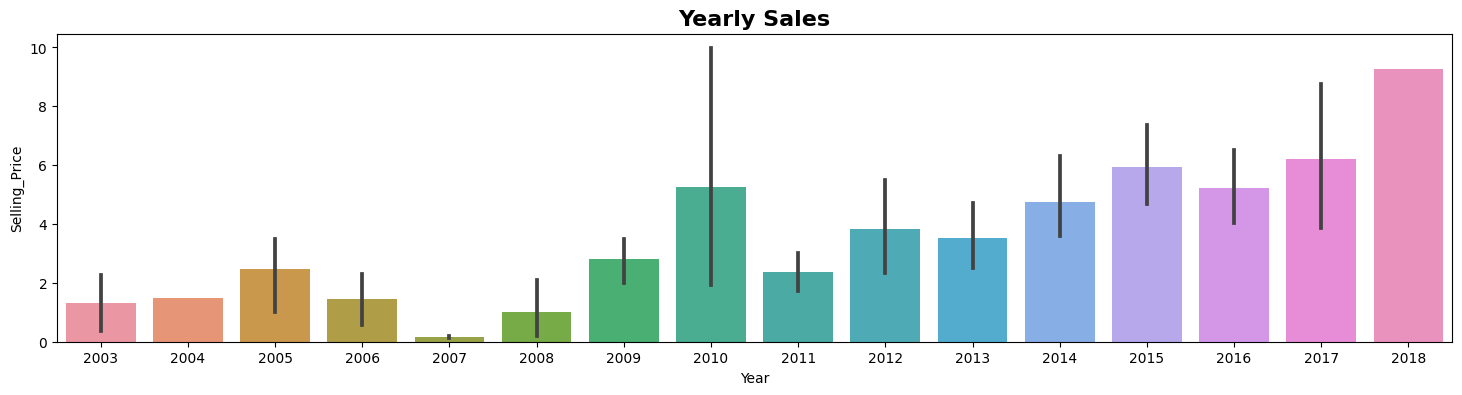

In [ ]:
plt.figure(figsize=(18,4))
sns.barplot(x=df['Year'], y=df['Selling_Price'])
plt.title('Yearly Sales', fontsize=16, fontweight='bold')



 Year 2018 has maximum sales.Least sale was in year 2007.

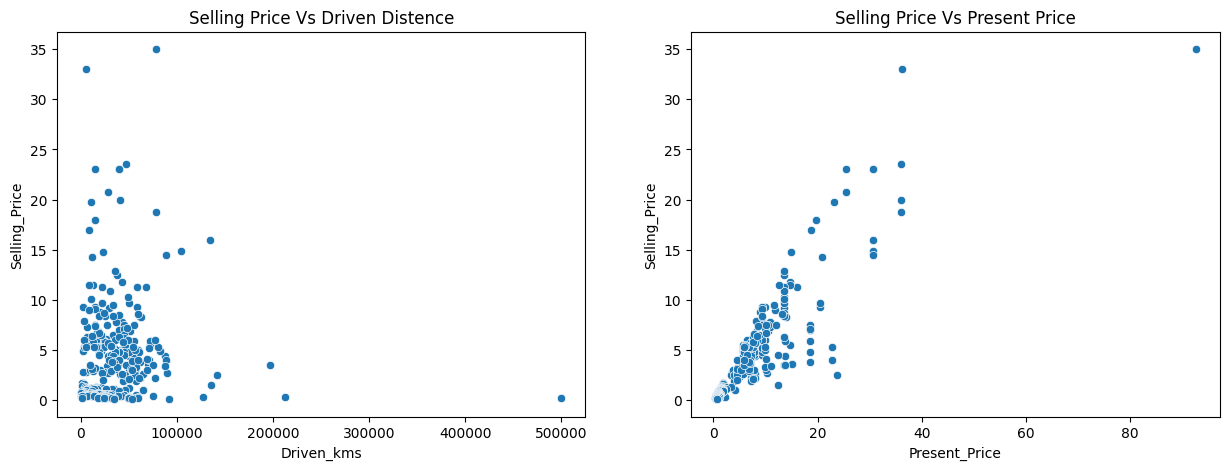

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')

plt.subplot(1,2,2)
sns.scatterplot(data=df,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()


Lesser the driven distance, higher the Selling Price.

Selling Price tends to increase with increase in the Present Price of cars

Encoding Categorical Variables :

In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9


Spliting Data into Input and Target  Data:



In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  Car_age  
0        0        9  
1      

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 278, dtype: float64


Spliting Data into Training and Testing Data :

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model Training and Evaluation :

Linear Regression :

In [ ]:
# loading the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lr = lr_model.fit(X_train,Y_train)
print('Training score : {}'.format(lr.score(X_train,Y_train)))
prediction_lr = lr.predict(X_test)

r2score = r2_score(Y_test,prediction_lr)
print('R2 score is : {}'.format(r2score))

mae = mean_absolute_error(Y_test,prediction_lr)
mse = mean_squared_error(Y_test,prediction_lr)
rmse = np.sqrt(mean_squared_error(Y_test,prediction_lr))
print('MAE : {}'.format(mae))
print('MSE : {}'.format(mse))
print('RMSE : {}'.format(rmse))

Training score : 0.8572653778176524
R2 score is : 0.7844325355193288
MAE : 1.0461421732293021
MSE : 2.075730240786652
RMSE : 1.440739477069554


Random Forest :

In [ ]:
rf = RandomForestRegressor()

In [ ]:
m = rf.fit(X_train,Y_train)
print('Training score : {}'.format(m.score(X_train,Y_train)))
prediction = m.predict(X_test)

r2score_rf = r2_score(Y_test,prediction)
print('R2 score is : {}'.format(r2score_rf))

mae_rf = mean_absolute_error(Y_test,prediction)
mse_rf = mean_squared_error(Y_test,prediction)
rmse_rf = np.sqrt(mean_squared_error(Y_test,prediction))
print('MAE : {}'.format(mae_rf))
print('MSE : {}'.format(mse_rf))
print('RMSE : {}'.format(rmse_rf))

Training score : 0.9917853674450382
R2 score is : 0.9769796218569656
MAE : 0.3101785714285711
MSE : 0.22166654499999963
RMSE : 0.470814767185567


In [ ]:

data = {'Model': ['Linear Regression','Random Forest'],
        'R2': [r2score,r2score_rf]}
d=pd.DataFrame(data)
d = d.sort_values(by='R2',ascending=False)
d


,Model,R2
1,Random Forest,0.976980
0,Linear Regression,0.784433


R2 Score is High for Random Forest Regressor, So Predicting values using it.

In [ ]:
out = pd.DataFrame({'Price_actual':Y_test,'Price_pred':prediction})
df_copy = df.copy()
res = df_copy.merge(out,left_index=True,right_index=True)
res.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age,Price_actual,Price_pred
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12,2.85,2.5640
7,s cross,2015,6.50,8.61,33429,1,0,0,0,8,6.50,6.7341
11,ciaz,2015,6.85,10.38,51000,1,0,0,0,8,6.85,7.1555
13,ertiga,2015,6.10,7.71,26000,0,0,0,0,8,6.10,5.6020
29,ciaz,2015,7.45,10.38,45000,1,0,0,0,8,7.45,7.1225
35,sx4,2011,2.95,7.74,49998,2,0,0,0,12,2.95,3.1635
78,corolla altis,2010,5.25,22.83,80000,0,0,1,0,13,5.25,6.1649
98,corolla altis,2013,7.05,18.61,45000,0,0,0,0,10,7.05,6.7590
110,KTM RC200,2016,1.20,1.78,6000,0,1,0,0,7,1.20,1.1881
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,0,1,0,0,8,1.15,1.1282


Conclusion :



*  Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.

*   Car age is effecting negatively as older the car lesser the Selling Price.
*   Selling Price of cars with Fuel type Diesel is higher.
*   Car of Manual type is of less priced whereas of Automatic type is high.
*   Cars sold by Individual tend to get less Selling Price when sold by Dealers.

